# Customer Segmentation with K-Means Clustering
This notebook demonstrates how to segment customers based on their purchasing behavior using K-Means clustering.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


# Exploratory Data Analysis and Preprocessing

In [5]:
file_path = '/content/customer_data.csv'
data = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the dataset
print("Dataset Preview:")
data.head()


Dataset Preview:


,CustomerID,Annual_Income,Spending_Score,Age
0,1,35795,9,49
1,2,20860,88,41
2,3,96820,1,58
3,4,74886,8,69
4,5,26265,88,66


# Step 2: Feature Selection

In [8]:
# Select features for clustering
features = ['Annual_Income', 'Spending_Score', 'Age']
X = data[features]

# Step 3: Data Standardization

In [9]:
# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Optimal Number of Clusters (Elbow Method)

In [10]:
# Calculate the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

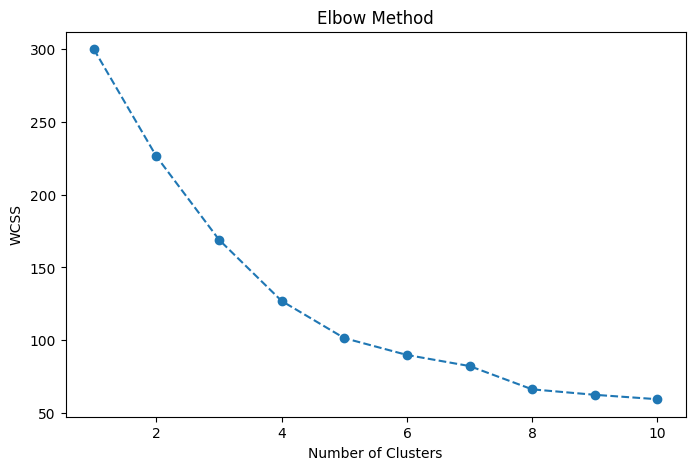

In [11]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-Means Clustering

In [12]:
# Based on the Elbow Curve, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Step 6: Visualize Clusters

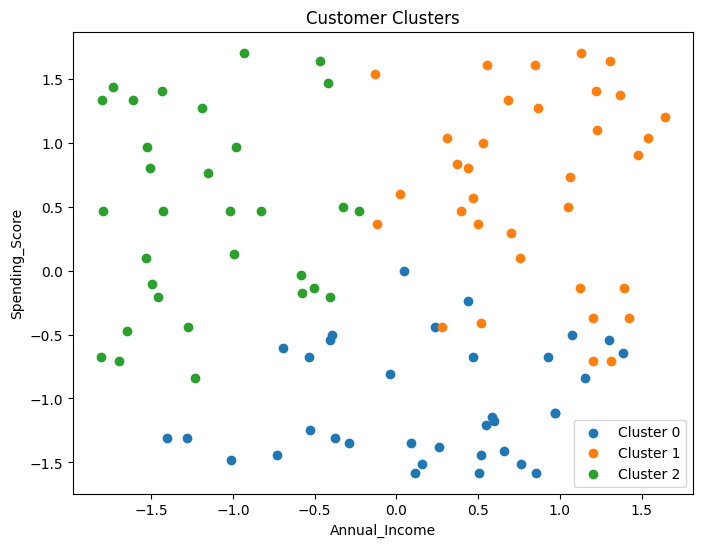

In [13]:
# Visualize the clusters using the first two features
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    plt.scatter(X_scaled[clusters == cluster, 0], X_scaled[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Customer Clusters')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

# Step 7: Save the Results

In [14]:
# Save the dataset with cluster labels to a new CSV file
output_file = 'customer_data_with_clusters.csv'
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")


Clustered data saved to customer_data_with_clusters.csv
